In [ ]:
import numpy as np 
import pandas as pd 
import time, warnings
import datetime as dt
#------------------------------------------------------------------------
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns
#------------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score,accuracy_score,classification_report,roc_auc_score
#------------------------------------------------------------------------
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline
warnings.filterwarnings("ignore")

In [ ]:
# ref : https://www.kaggle.com/code/vickodanendra/churn-probability

In [ ]:
from sklearn.cluster import KMeans
#------------------------------------------------------------------------
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
#------------------------------------------------------------------------
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split

import xgboost as xgb


In [ ]:
# collecting all given data 

customer_data=pd.read_csv('/content/drive/MyDrive/olist_customers_dataset.csv.zip')
payments_data=pd.read_csv('/content/drive/MyDrive/olist_order_payments_dataset.csv.zip')
location_data=pd.read_csv('/content/drive/MyDrive/olist_geolocation_dataset.csv.zip')
reviews_data=pd.read_csv('/content/drive/MyDrive/olist_order_reviews_dataset.csv.zip')
orders_data=pd.read_csv('/content/drive/MyDrive/olist_orders_dataset.csv.zip')
sellers_data=pd.read_csv('/content/drive/MyDrive/olist_sellers_dataset.csv')
name_translation_data=pd.read_csv('/content/drive/MyDrive/product_category_name_translation.csv')
products_data=pd.read_csv('/content/drive/MyDrive/olist_products_dataset.csv.zip')
items_data=pd.read_csv('/content/drive/MyDrive/olist_order_items_dataset.csv.zip')

In [ ]:
# EDA



In [ ]:
# customer analysis 

customer_data2 = customer_data["customer_unique_id"].nunique()
print("Total unique customer : ", customer_data2)

Total unique customer :  96096


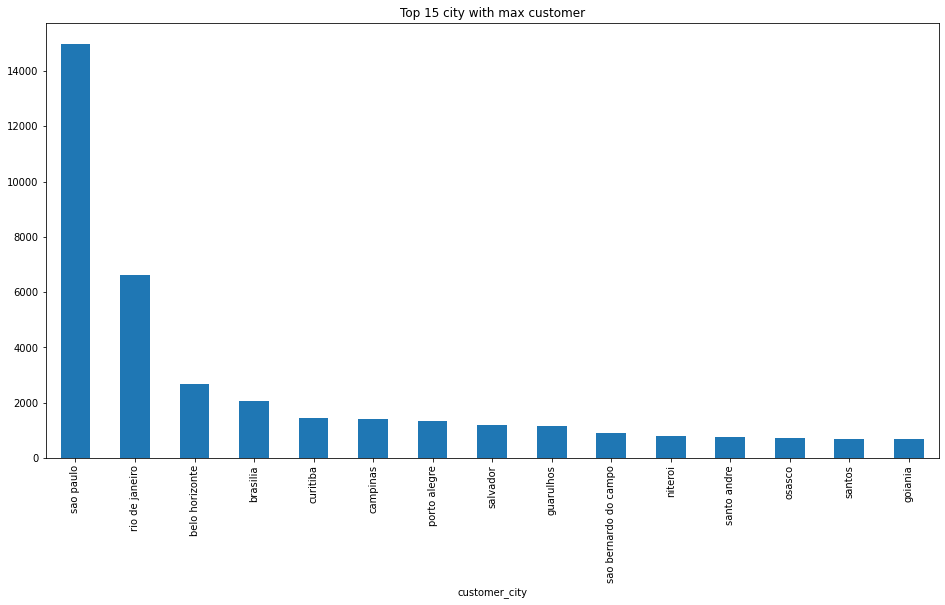

In [ ]:
#city = customer_data2["customer_city"].nunique()

customer_city = customer_data.groupby('customer_city')['customer_unique_id'].nunique()
customer_city_asc = customer_city.sort_values(ascending=False)
Top_15_city = customer_city_asc.head(15)

plt.figure(figsize=(16, 8))

Top_15_city.plot(kind="bar", title="Top 15 city with max customer")

In [ ]:
# review score 

# Percentage Score Review
reviews_data["review_score"].value_counts() / reviews_data["review_score"].count() * 100

5    57.776344
4    19.291704
1    11.513344
3     8.242965
2     3.175643
Name: review_score, dtype: float64

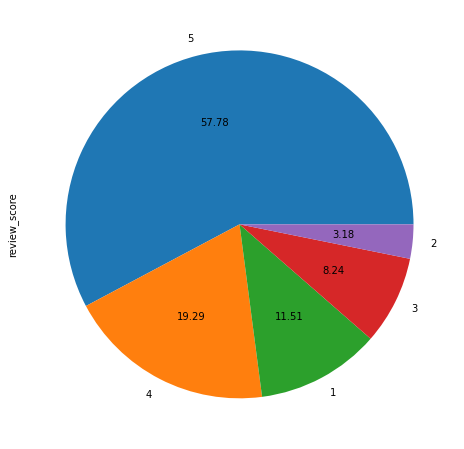

In [ ]:
# ref : https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct
reviews_data['review_score'].value_counts().plot.pie(autopct='%.2f', figsize=(8, 8))

In [ ]:
customer_order = pd.merge(customer_data,orders_data[['order_id','customer_id','order_purchase_timestamp']],on='customer_id')

#Dropping some redundant columns
customer_order.drop(['customer_zip_code_prefix'],axis=1,inplace=True)

freq = pd.DataFrame(customer_order.groupby('customer_unique_id')['customer_id'].count())

df3 = pd.merge(customer_order,freq,on='customer_unique_id')

df3.rename(columns = {'customer_id_x':'customer_id', 'customer_id_y':'Frequency',
                              }, inplace = True)

Text(0.5, 1.0, 'TOP 15 states with max orders')

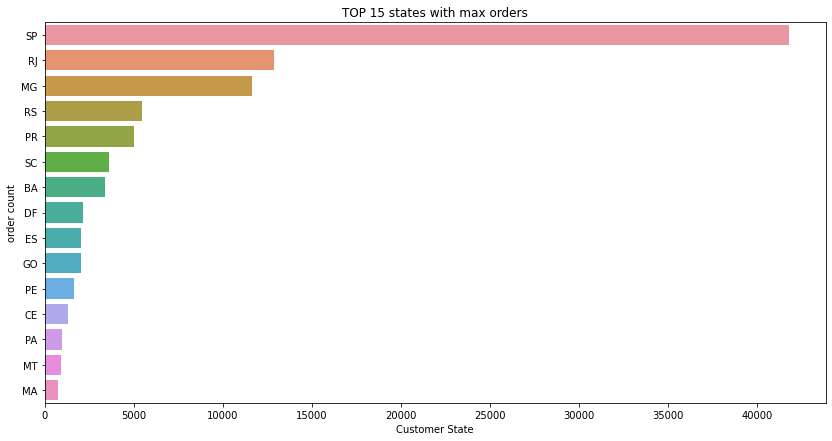

In [ ]:
# ref : https://seaborn.pydata.org/generated/seaborn.barplot.html

Top_state_order = df3.groupby("customer_state")["order_id"].count().reset_index().sort_values("order_id", ascending=False)

plt.figure(figsize = (14, 7))

sns.barplot(x="order_id", y="customer_state", data=Top_state_order[:15])

plt.xlabel("Customer State")

plt.ylabel("order count")

plt.title("TOP 15 states with max orders")



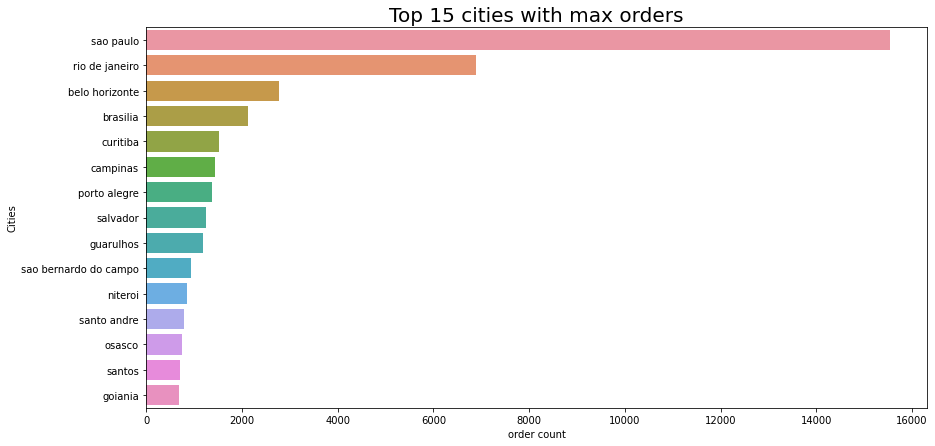

In [ ]:
# cities generating most order 

Top_cities_order = df3.groupby("customer_city")["order_id"].count().reset_index().sort_values("order_id", ascending = False)

plt.figure(figsize = (14, 7))

sns.barplot(x = "order_id", y = "customer_city", data = Top_cities_order[:15])

plt.xlabel("order count")

plt.ylabel("Cities")


plt.title("Top 15 cities with max orders", fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Top 15 products')

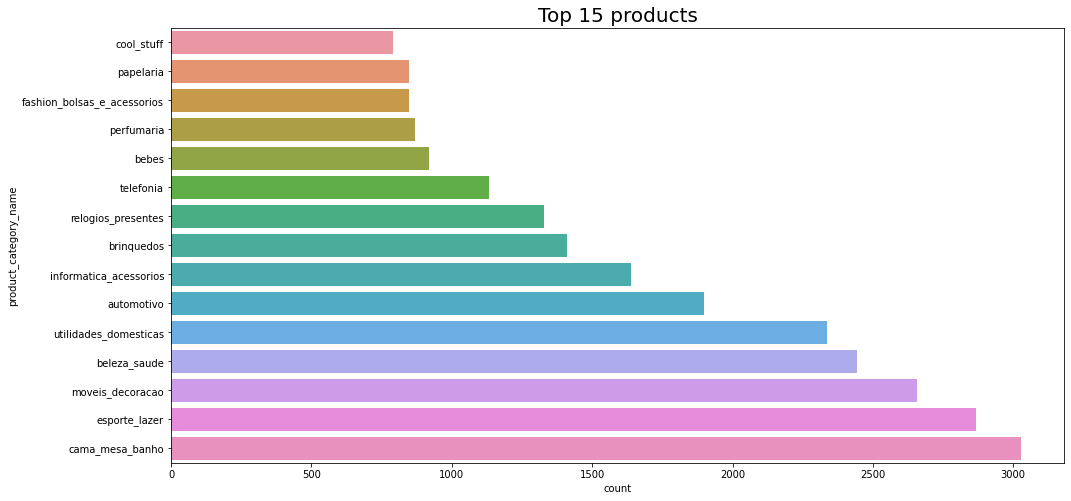

In [ ]:
# ref : https://seaborn.pydata.org/generated/seaborn.countplot.html

plt.figure(figsize=(16, 8))

sns.countplot(y='product_category_name', data=products_data, order=products_data['product_category_name'].value_counts()[:15].sort_values().index)

plt.title("Top 15 products", fontsize = 20)

In [ ]:
df2=pd.merge(df3,reviews_data[['order_id','review_score']],on='order_id')

pay_val = payments_data[['order_id','payment_value']].groupby('order_id').sum().reset_index()

df11 = pd.merge(df2,pay_val,on='order_id')

df11['order_purchase_timestamp']=pd.to_datetime(df11['order_purchase_timestamp']).dt.date
df11.head()

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_purchase_timestamp,Frequency,review_score,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16,1,4,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,2018-01-12,1,5,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19,1,5,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,2018-03-13,1,5,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29,1,5,252.25


In [ ]:
avg_review_score = df11.groupby('customer_unique_id')['review_score'].mean().\
    reset_index().rename({'review_score':'avg_review_score'},axis = 1)
avg_review_score.head()

,customer_unique_id,avg_review_score
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.0
2,0000f46a3911fa3c0805444483337064,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,4.0
4,0004aac84e0df4da2b147fca70cf8255,5.0


In [ ]:
#customer's activity data
activitydata = df11.groupby(['customer_unique_id'])['order_purchase_timestamp'].max()
activitydata = pd.DataFrame(data = activitydata).reset_index()
activitydata = activitydata.rename(columns = {'order_purchase_timestamp' : 'last_purchase'})
activitydata['last_purchase']=activitydata[['last_purchase']].apply(pd.to_datetime)
activitydata['last_active'] = (activitydata['last_purchase'].max() - activitydata['last_purchase']).dt.days
activitydata

,customer_unique_id,last_purchase,last_active
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,160
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,163
2,0000f46a3911fa3c0805444483337064,2017-03-10,586
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,370
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,337
...,...,...,...
95374,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08,496
95375,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10,311
95376,ffff371b4d645b6ecea244b27531430a,2017-02-07,617
95377,ffff5962728ec6157033ef9805bacc48,2018-05-02,168


In [ ]:
dfe11 = pd.merge(df11,avg_review_score,on='customer_unique_id')


In [ ]:
dfe11 = pd.merge(dfe11,activitydata,on='customer_unique_id')

In [ ]:
# ref : https://www.geeksforgeeks.org/rfm-analysis-analysis-using-python/

# calculating recency

#1 taking it in order
Recency = pd.DataFrame(dfe11.groupby('customer_unique_id')['order_purchase_timestamp'].max())

#2 calculating the recent date
Recent_date = Recency['order_purchase_timestamp'].max()

#3 taking difference betweeen recent date and actual date for all actual dates in recent days column

Recency['Recent_days']=Recent_date-Recency['order_purchase_timestamp']

#4 taking those days in numerical format

Recency['Recent_days']=Recency['Recent_days'].dt.days


In [ ]:
df22 = pd.merge(dfe11,Recency['Recent_days'],on='customer_unique_id')

# ref : https://www.geeksforgeeks.org/rfm-analysis-analysis-using-python/

# we are calculating how much total value each unique customer paid.

Monetary = pd.DataFrame(df22[['customer_unique_id','payment_value']].groupby('customer_unique_id')['payment_value'].sum())

Monetary.rename(columns = {'payment_value':'Monetary'}, inplace = True)

dataset1 = pd.merge(df22,Monetary['Monetary'],on='customer_unique_id')

In [ ]:
#ref : https://www.geeksforgeeks.org/rfm-analysis-analysis-using-python/

# calculating RFM score 

dataset1['R_rank'] = dataset1['Recent_days'].rank(ascending=False)
dataset1['F_rank'] = dataset1['Frequency'].rank(ascending=True)
dataset1['M_rank'] = dataset1['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
dataset1['R_rank_norm'] = (dataset1['R_rank']/dataset1['R_rank'].max())*100
dataset1['F_rank_norm'] = (dataset1['F_rank']/dataset1['F_rank'].max())*100
dataset1['M_rank_norm'] = (dataset1['M_rank']/dataset1['M_rank'].max())*100
 
dataset1.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
dataset1.head()

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_purchase_timestamp,Frequency,review_score,payment_value,avg_review_score,last_purchase,last_active,Recent_days,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16,1,4,146.87,4.0,2017-05-16,519,519,146.87,9.557260,46.60384,63.134555
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,2018-01-12,1,5,335.48,5.0,2018-01-12,278,278,335.48,47.529807,46.60384,89.646554
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19,1,5,157.73,5.0,2018-05-19,151,151,157.73,78.593169,46.60384,66.467452
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,2018-03-13,1,5,173.30,5.0,2018-03-13,218,218,173.30,62.032996,46.60384,70.893845
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29,1,5,252.25,5.0,2018-07-29,80,80,252.25,92.490652,46.60384,83.851526


In [ ]:
# ref : https://www.geeksforgeeks.org/rfm-analysis-analysis-using-python/

# RFM score is calculated based upon recency, frequency, monetary value normalize ranks. Based upon this score we divide our customers. 
# Here we rate them on a scale of 5.
# Formula used for calculating rfm score is : 0.15*Recency score + 0.28*Frequency score + 0.57 *Monetary score

dataset1['RFM_Score'] = 0.15*dataset1['R_rank_norm'] + 0.28 * dataset1['F_rank_norm'] + 0.57*dataset1['M_rank_norm']
dataset1['RFM_Score'] *= 0.05
#rfm_df = rfm_df.round(2)


In [ ]:
dataset1.drop(columns=['Frequency', 'Recent_days', 'Monetary'], inplace=True)

In [ ]:
# make change here 

#dataset1['review_score'] = [0 if x <= 2 else 1 for x in dataset1['review_score']]


In [ ]:
dataset1

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_purchase_timestamp,review_score,payment_value,avg_review_score,last_purchase,last_active,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16,4,146.87,4.0,2017-05-16,519,9.557260,46.60384,63.134555,2.523468
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,2018-01-12,5,335.48,5.0,2018-01-12,278,47.529807,46.60384,89.646554,3.563854
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19,5,157.73,5.0,2018-05-19,151,78.593169,46.60384,66.467452,3.136225
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,2018-03-13,5,173.30,5.0,2018-03-13,218,62.032996,46.60384,70.893845,3.138176
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29,5,252.25,5.0,2018-07-29,80,92.490652,46.60384,83.851526,3.735902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99218,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,2018-04-07,4,88.78,4.0,2018-04-07,193,67.894541,46.60384,39.449523,2.285974
99219,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04,5,129.06,5.0,2018-04-04,196,67.211735,46.60384,56.925814,2.778927
99220,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,2018-04-08,1,56.04,1.0,2018-04-08,192,68.073934,46.60384,19.594247,1.721444
99221,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,2017-11-03,5,711.07,5.0,2017-11-03,348,32.010723,46.60384,97.110045,3.660170


In [ ]:
orders_data.drop(columns=['customer_id','order_purchase_timestamp', 'order_status'], inplace=True)

dataset2 = pd.merge(dataset1,orders_data,on='order_id')

# converting values in date format only 

dataset2['order_approved_at']=pd.to_datetime(dataset2['order_approved_at']).dt.date

dataset2['order_delivered_carrier_date']=pd.to_datetime(dataset2['order_delivered_carrier_date']).dt.date

dataset2['order_delivered_customer_date']=pd.to_datetime(dataset2['order_delivered_customer_date']).dt.date

dataset2['order_estimated_delivery_date']=pd.to_datetime(dataset2['order_estimated_delivery_date']).dt.date



In [ ]:
dataset2

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_purchase_timestamp,review_score,payment_value,avg_review_score,last_purchase,last_active,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16,4,146.87,4.0,2017-05-16,519,9.557260,46.60384,63.134555,2.523468,2017-05-16,2017-05-23,2017-05-25,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,2018-01-12,5,335.48,5.0,2018-01-12,278,47.529807,46.60384,89.646554,3.563854,2018-01-12,2018-01-15,2018-01-29,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19,5,157.73,5.0,2018-05-19,151,78.593169,46.60384,66.467452,3.136225,2018-05-20,2018-06-11,2018-06-14,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,2018-03-13,5,173.30,5.0,2018-03-13,218,62.032996,46.60384,70.893845,3.138176,2018-03-13,2018-03-27,2018-03-28,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29,5,252.25,5.0,2018-07-29,80,92.490652,46.60384,83.851526,3.735902,2018-07-29,2018-07-30,2018-08-09,2018-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99218,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,2018-04-07,4,88.78,4.0,2018-04-07,193,67.894541,46.60384,39.449523,2.285974,2018-04-07,2018-04-11,2018-04-13,2018-04-25
99219,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04,5,129.06,5.0,2018-04-04,196,67.211735,46.60384,56.925814,2.778927,2018-04-04,2018-04-05,2018-04-11,2018-04-20
99220,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,2018-04-08,1,56.04,1.0,2018-04-08,192,68.073934,46.60384,19.594247,1.721444,2018-04-08,2018-04-09,2018-05-09,2018-05-02
99221,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,2017-11-03,5,711.07,5.0,2017-11-03,348,32.010723,46.60384,97.110045,3.660170,2017-11-03,2017-11-06,2017-11-16,2017-12-05


In [ ]:
# calculating shipping days 

dataset2['shipping days'] = (dataset2['order_delivered_customer_date'] - dataset2['order_approved_at']).dt.days


# calculating delayed delivery

#shipping['delayed_delivery']=(data.order_delivered_customer_date>data.order_estimated_delivery_date).astype(int)
#shipping
#DED will calculate delayed or earlier in terms of no. of days 

dataset2['DED'] = (dataset2['order_estimated_delivery_date'] - dataset2['order_delivered_customer_date']).dt.days

# ref : 
# converting all positive values into 0 and negetive to 1 to get more importance to negative values 

dataset2['DED2']=(dataset2['order_delivered_customer_date'] > dataset2['order_estimated_delivery_date']).astype(int)

dataset2.drop(columns=['order_id', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'], inplace=True)


In [ ]:
# ref : https://www.kaggle.com/code/vickodanendra/churn-probability

dataset2['is_churn'] = dataset2['last_active'].apply(lambda x: 0 if x >= 365 else 1)
dataset2['is_churn'].value_counts()
dataset2.head()

,customer_id,customer_unique_id,customer_city,customer_state,order_purchase_timestamp,review_score,payment_value,avg_review_score,last_purchase,last_active,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,shipping days,DED,DED2,is_churn
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,2017-05-16,4,146.87,4.0,2017-05-16,519,9.557260,46.60384,63.134555,2.523468,9.0,11.0,0,0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,2018-01-12,5,335.48,5.0,2018-01-12,278,47.529807,46.60384,89.646554,3.563854,17.0,8.0,0,1
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,2018-05-19,5,157.73,5.0,2018-05-19,151,78.593169,46.60384,66.467452,3.136225,25.0,-1.0,1,1
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,2018-03-13,5,173.30,5.0,2018-03-13,218,62.032996,46.60384,70.893845,3.138176,15.0,13.0,0,1
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,2018-07-29,5,252.25,5.0,2018-07-29,80,92.490652,46.60384,83.851526,3.735902,11.0,6.0,0,1


In [ ]:
dataset3 = dataset2[['customer_id', 'customer_unique_id', 'customer_city', 'customer_state', 'payment_value', 'last_purchase', 'last_active', 'R_rank_norm', 'F_rank_norm', 'M_rank_norm', 'RFM_Score', 'shipping days', 'DED', 'DED2', 'is_churn', 'avg_review_score']]

In [ ]:
# vectorization of customer city 

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

dataset3['customer_city'] = encoder.fit_transform(dataset3['customer_city'])

# vectorization of customer_id, customer_unique_id, customer state

dataset3['customer_state']=encoder.fit_transform(dataset3['customer_state'])
dataset3['customer_id']=encoder.fit_transform(dataset3['customer_id'])
dataset3['customer_unique_id']=encoder.fit_transform(dataset3['customer_unique_id'])



In [ ]:
dataset3=dataset3.dropna()
dataset3

,customer_id,customer_unique_id,customer_city,customer_state,payment_value,last_purchase,last_active,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,shipping days,DED,DED2,is_churn,avg_review_score
0,2591,50037,1382,25,146.87,2017-05-16,519,9.557260,46.60384,63.134555,2.523468,9.0,11.0,0,0,4.0
1,9489,15328,3427,25,335.48,2018-01-12,278,47.529807,46.60384,89.646554,3.563854,17.0,8.0,0,1,5.0
2,30223,2258,3595,25,157.73,2018-05-19,151,78.593169,46.60384,66.467452,3.136225,25.0,-1.0,1,1,5.0
3,69056,14095,2340,25,173.30,2018-03-13,218,62.032996,46.60384,70.893845,3.138176,15.0,13.0,0,1,5.0
4,30469,19593,707,25,252.25,2018-07-29,80,92.490652,46.60384,83.851526,3.735902,11.0,6.0,0,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99218,9212,9817,3595,25,88.78,2018-04-07,193,67.894541,46.60384,39.449523,2.285974,6.0,12.0,0,1,4.0
99219,89516,79593,3773,25,129.06,2018-04-04,196,67.211735,46.60384,56.925814,2.778927,7.0,9.0,0,1,5.0
99220,36145,87220,1374,5,56.04,2018-04-08,192,68.073934,46.60384,19.594247,1.721444,31.0,-7.0,1,1,1.0
99221,33295,43240,772,22,711.07,2017-11-03,348,32.010723,46.60384,97.110045,3.660170,13.0,19.0,0,1,5.0


In [ ]:
dataset3.drop(columns=['customer_id'], inplace=True)


In [ ]:
dataset3.drop(columns=['last_purchase'], inplace=True)


In [ ]:
dataset3['avg_review_score'] = [0 if x <= 2 else 1 for x in dataset3['avg_review_score']]


In [ ]:
dataset3 


,customer_unique_id,customer_city,customer_state,payment_value,last_active,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,shipping days,DED,DED2,is_churn,avg_review_score
0,50037,1382,25,146.87,519,9.557260,46.60384,63.134555,2.523468,9.0,11.0,0,0,1
1,15328,3427,25,335.48,278,47.529807,46.60384,89.646554,3.563854,17.0,8.0,0,1,1
2,2258,3595,25,157.73,151,78.593169,46.60384,66.467452,3.136225,25.0,-1.0,1,1,1
3,14095,2340,25,173.30,218,62.032996,46.60384,70.893845,3.138176,15.0,13.0,0,1,1
4,19593,707,25,252.25,80,92.490652,46.60384,83.851526,3.735902,11.0,6.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99218,9817,3595,25,88.78,193,67.894541,46.60384,39.449523,2.285974,6.0,12.0,0,1,1
99219,79593,3773,25,129.06,196,67.211735,46.60384,56.925814,2.778927,7.0,9.0,0,1,1
99220,87220,1374,5,56.04,192,68.073934,46.60384,19.594247,1.721444,31.0,-7.0,1,1,0
99221,43240,772,22,711.07,348,32.010723,46.60384,97.110045,3.660170,13.0,19.0,0,1,1


In [ ]:
dataset3.drop(columns=['customer_unique_id'], inplace=True)
dataset3.drop(columns=['customer_city'], inplace=True)
dataset3.drop(columns=['customer_state'], inplace=True)
dataset3.drop(columns=['R_rank_norm'], inplace=True)
dataset3.drop(columns=['F_rank_norm'], inplace=True)
dataset3.drop(columns=['M_rank_norm'], inplace=True)
dataset3.drop(columns=['is_churn'], inplace=True)




In [ ]:
dataset3


,payment_value,last_active,RFM_Score,shipping days,DED,DED2,avg_review_score
0,146.87,519,2.523468,9.0,11.0,0,1
1,335.48,278,3.563854,17.0,8.0,0,1
2,157.73,151,3.136225,25.0,-1.0,1,1
3,173.30,218,3.138176,15.0,13.0,0,1
4,252.25,80,3.735902,11.0,6.0,0,1
...,...,...,...,...,...,...,...
99218,88.78,193,2.285974,6.0,12.0,0,1
99219,129.06,196,2.778927,7.0,9.0,0,1
99220,56.04,192,1.721444,31.0,-7.0,1,0
99221,711.07,348,3.660170,13.0,19.0,0,1


In [ ]:
# splitting the dataset into train and tests

X_train,X_test,y_train,y_test=train_test_split(dataset3.iloc[:,:-1],dataset3.iloc[:,-1], test_size=0.2, random_state=31)

In [ ]:
X_train


,payment_value,last_active,RFM_Score,shipping days,DED,DED2
55890,38.01,259,1.281497,3.0,11.0,0
53250,75.53,574,1.607419,4.0,15.0,0
9762,169.46,480,2.752138,24.0,18.0,0
55440,138.36,237,2.799911,7.0,13.0,0
13193,66.82,271,1.785895,14.0,33.0,0
...,...,...,...,...,...,...
71338,126.35,509,2.326489,7.0,18.0,0
82882,157.79,183,3.073862,6.0,17.0,0
28329,71.14,481,1.598776,6.0,18.0,0
27424,139.43,279,2.738080,10.0,27.0,0


In [ ]:
y_train

55890    1
53250    1
9762     1
55440    1
13193    0
        ..
71338    1
82882    1
28329    1
27424    1
55593    0
Name: avg_review_score, Length: 77075, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression

LogisticRegression_model = LogisticRegression()

LogisticRegression_model.fit(X_train,y_train)

LR_predicted_y= LogisticRegression_model.predict(X_test)

LR_accuracy = LogisticRegression_model.score(X_test,y_test)

print("Logistic_Regression_accuracy:",LR_accuracy)


Logistic_Regression_accuracy: 0.8913799366858685


In [ ]:
import pickle
pickle.dump(LogisticRegression_model, open('LR_model3.pkl', 'wb'))

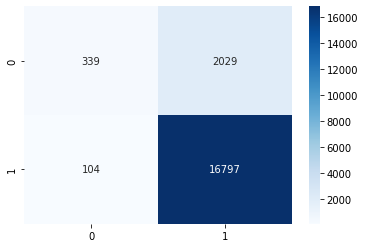

In [ ]:
from sklearn.metrics import confusion_matrix

Confusion_Matrix_LR = confusion_matrix(y_test, LR_predicted_y)

sns.heatmap(Confusion_Matrix_LR, annot=True, fmt='d', cmap='Blues')

In [ ]:
#GBDT

GB = GradientBoostingClassifier()

# training data 
GB.fit(X_train, y_train)

# prediction on test data 
GB_predicted_y = GB.predict(X_test)

print("Gradient_Boosting_accuracy:", accuracy_score(y_test, GB_predicted_y))


Gradient_Boosting_accuracy: 0.8990087705641185


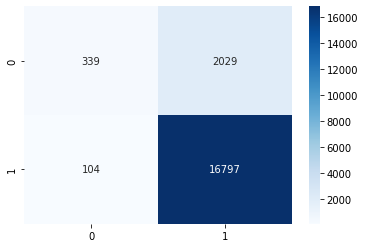

In [ ]:
from sklearn.metrics import confusion_matrix

Confusion_Matrix_GBDT = confusion_matrix(y_test, GB_predicted_y)

sns.heatmap(Confusion_Matrix_LR, annot=True, fmt='d', cmap='Blues')